<a href="https://colab.research.google.com/github/gapton76/Labs/blob/master/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install -U -q kaggle
#!mkdir -p ~/.kaggle
#!echo '{"username":"gapton76","key":"2e4d19178578b29fcdba3efdb423eddd"}' >~/.kaggle/kaggle.json
#!chmod 600 ~/.kaggle/kaggle.json

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as se
import time
import timeit
%matplotlib inline

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
train=pd.read_csv('/content/gdrive/My Drive/Babra/train_values.csv')
labels=pd.read_csv('/content/gdrive/My Drive/Babra/train_labels.csv')
test=pd.read_csv('/content/gdrive/My Drive/Babra/test_values.csv')
labels.head()

,row_id,accepted
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [5]:
train.head(3)

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,False
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,False
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,False


In [6]:
train.describe()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,460052.000000,477535.000000,477534.000000,477560.000000,477486.000000,477435.000000,477470.000000,500000.000000
mean,249999.500000,1.366276,1.047650,2.066810,1.109590,221.753158,2.764722,181.606972,23.726924,144.542062,2.036228,4.786586,1.462374,102.389521,5416.833956,31.617310,69235.603298,91.832624,1427.718282,1886.147065,3720.121344
std,144337.711634,0.690555,0.231404,0.948371,0.326092,590.641648,0.543061,138.464169,15.982768,100.243612,0.511351,1.024927,0.677685,153.534496,2728.144999,26.333938,14810.058791,14.210924,737.559511,914.123744,1838.313175
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,14.000000,0.534000,17858.000000,3.981000,4.000000,1.000000,0.000000
25%,124999.750000,1.000000,1.000000,1.000000,1.000000,93.000000,3.000000,25.000000,6.000000,57.000000,2.000000,5.000000,1.000000,47.000000,3744.000000,10.700000,59731.000000,88.067250,944.000000,1301.000000,2442.000000
50%,249999.500000,1.000000,1.000000,2.000000,1.000000,162.000000,3.000000,192.000000,26.000000,131.000000,2.000000,5.000000,1.000000,74.000000,4975.000000,22.901000,67526.000000,100.000000,1327.000000,1753.000000,3731.000000
75%,374999.250000,2.000000,1.000000,3.000000,1.000000,266.000000,3.000000,314.000000,37.000000,246.000000,2.000000,5.000000,2.000000,117.000000,6467.000000,46.020000,75351.000000,100.000000,1780.000000,2309.000000,5436.000000
max,499999.000000,4.000000,3.000000,3.000000,3.000000,100878.000000,3.000000,408.000000,52.000000,324.000000,4.000000,7.000000,4.000000,10139.000000,37097.000000,100.000000,125248.000000,100.000000,8771.000000,13623.000000,6508.000000


In [7]:
labels.accepted.describe()

count    500000.000000
mean          0.500228
std           0.500000
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: accepted, dtype: float64

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  int64  
 2   property_type                   500000 non-null  int64  
 3   loan_purpose                    500000 non-null  int64  
 4   occupancy                       500000 non-null  int64  
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  int64  
 7   msa_md                          500000 non-null  int64  
 8   state_code                      500000 non-null  int64  
 9   county_code                     500000 non-null  int64  
 10  applicant_ethnicity             500000 non-null  int64  
 11  applicant_race                  500000 non-null  int64  
 12  applicant_sex   

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  int64  
 2   property_type                   500000 non-null  int64  
 3   loan_purpose                    500000 non-null  int64  
 4   occupancy                       500000 non-null  int64  
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  int64  
 7   msa_md                          500000 non-null  int64  
 8   state_code                      500000 non-null  int64  
 9   county_code                     500000 non-null  int64  
 10  applicant_ethnicity             500000 non-null  int64  
 11  applicant_race                  500000 non-null  int64  
 12  applicant_sex   

In [10]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype
---  ------    --------------   -----
 0   row_id    500000 non-null  int64
 1   accepted  500000 non-null  int64
dtypes: int64(2)
memory usage: 7.6 MB


In [11]:
train.applicant_income.describe()

count    460052.000000
mean        102.389521
std         153.534496
min           1.000000
25%          47.000000
50%          74.000000
75%         117.000000
max       10139.000000
Name: applicant_income, dtype: float64

In [12]:
train.applicant_income.isnull().sum()

39948

In [13]:
(train.applicant_income>np.mean(train.applicant_income))

0         False
1         False
2         False
3          True
4         False
          ...  
499995    False
499996     True
499997    False
499998    False
499999    False
Name: applicant_income, Length: 500000, dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff786e49390>]],
      dtype=object)

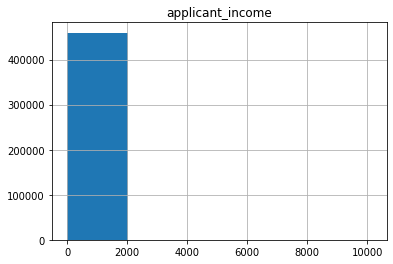

In [14]:
train.hist(column='applicant_income', bins=5)

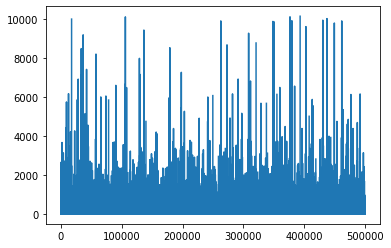

In [15]:
plt.plot(train.applicant_income)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7868be2b0>]],
      dtype=object)

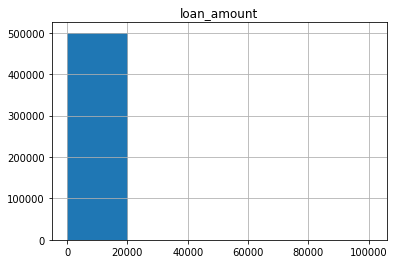

In [16]:
train.hist(column='loan_amount', bins=5)

(array([172., 220., 213., 143.,  97.,  49.,  35.,  24.,  11.,  10.,   5.,
          5.,   3.,   1.,   2.,   2.,   1.,   2.,   1.,   0.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 6.66200e+01, 1.32240e+02, 1.97860e+02, 2.63480e+02,
        3.29100e+02, 3.94720e+02, 4.60340e+02, 5.25960e+02, 5.91580e+02,
        6.57200e+02, 7.22820e+02, 7.88440e+02, 8.54060e+02, 9.19680e+02,
        9.85300e+02, 1.05092e+03, 1.11654e+03, 1.18216e+03, 1.24778e+03,
        1.31340e+03, 1.37902e+03, 1.44464e+03, 1.51026e+03, 1.57588e+03,
        1.64150e+03, 1.70712e+03, 1.77274e+03, 1.83836e+03, 1.90398e+03,
        1.96960e+03, 2.03522e+03, 2.10084e+03, 2.16646e+03, 2.23208e+03,
        2.29770e+03, 2.36332e+03, 2.42894e+03, 2.49456e+03, 2.56018e+03,
        2.62580e+03, 2.69142e+03, 2.75704e+03, 2.82266e+03, 2.88828e+03,
 

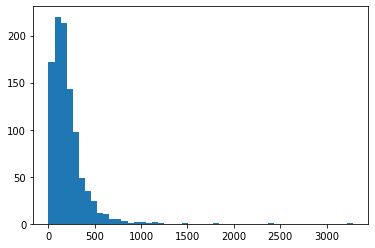

In [17]:
x = train.loan_amount[:1000]
plt.hist(x, bins=50)

In [18]:
bool_data = train.select_dtypes(include=['bool']).copy()
new_data_lc = bool_data.copy()
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].astype('category')
new_data_lc['co_applicant'] = new_data_lc['co_applicant'].cat.codes
#replace_map = {'co_applicant': {False: 0, True:1}}
#All.replace(replace_map, inplace=True)
#All.head()
new_data_lc.head()

,co_applicant
0,0
1,0
2,0
3,1
4,0


In [19]:
new_All=train.drop(['co_applicant'], axis=1)
All=pd.concat([new_All,new_data_lc,labels.accepted],axis=1)
All.head()

,row_id,loan_type,property_type,loan_purpose,occupancy,loan_amount,preapproval,msa_md,state_code,county_code,applicant_ethnicity,applicant_race,applicant_sex,applicant_income,population,minority_population_pct,ffiecmedian_family_income,tract_to_msa_md_income_pct,number_of_owner-occupied_units,number_of_1_to_4_family_units,lender,co_applicant,accepted
0,0,3,1,1,1,70.0,3,18,37,246,2,5,1,24.0,6203.0,44.230,60588.0,50.933,716.0,2642.0,4536,0,1
1,1,1,1,3,1,178.0,3,369,52,299,1,5,1,57.0,5774.0,15.905,54821.0,100.000,1622.0,2108.0,2458,0,0
2,2,2,1,3,1,163.0,3,16,10,306,2,5,1,67.0,6094.0,61.270,67719.0,100.000,760.0,1048.0,5710,0,1
3,3,1,1,1,1,155.0,1,305,47,180,2,5,1,105.0,6667.0,6.246,78439.0,100.000,2025.0,2299.0,5888,1,1
4,4,1,1,1,1,305.0,3,24,37,20,2,3,2,71.0,6732.0,100.000,63075.0,82.200,1464.0,1847.0,289,0,1


In [20]:
All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   row_id                          500000 non-null  int64  
 1   loan_type                       500000 non-null  int64  
 2   property_type                   500000 non-null  int64  
 3   loan_purpose                    500000 non-null  int64  
 4   occupancy                       500000 non-null  int64  
 5   loan_amount                     500000 non-null  float64
 6   preapproval                     500000 non-null  int64  
 7   msa_md                          500000 non-null  int64  
 8   state_code                      500000 non-null  int64  
 9   county_code                     500000 non-null  int64  
 10  applicant_ethnicity             500000 non-null  int64  
 11  applicant_race                  500000 non-null  int64  
 12  applicant_sex   

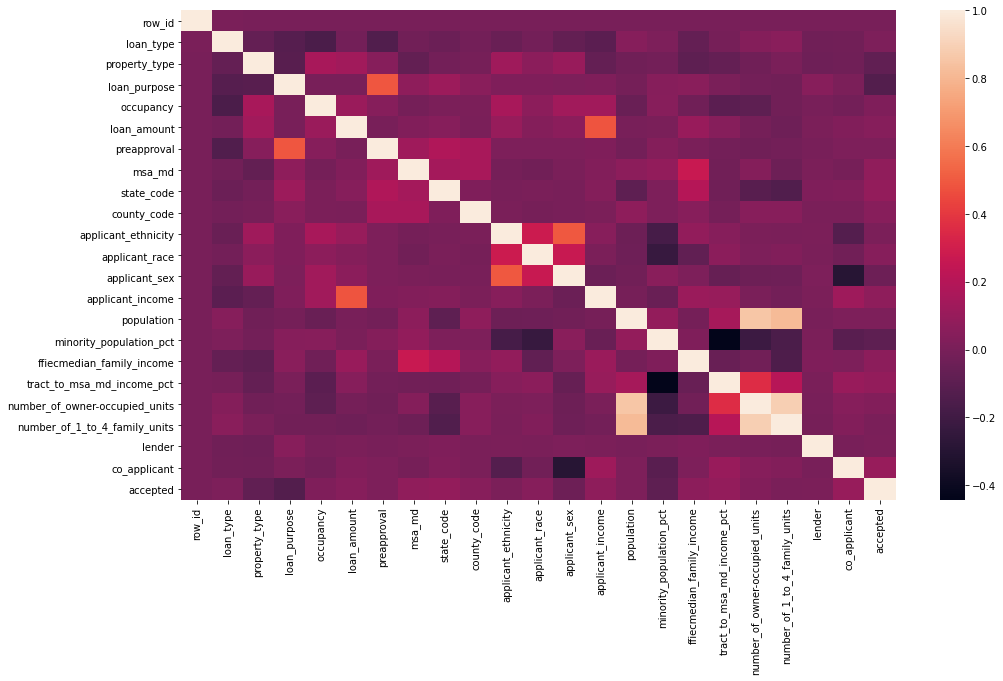

In [21]:
plt.rcParams["figure.figsize"] = [16,9]
se.heatmap(All.corr())

In [22]:
#scatter_matrix(All.iloc[:,1:20], c='y', figsize=(15,15), s=150, marker='D')
#plt.show()
All=All.dropna()

In [23]:
All.isna().sum()


row_id                            0
loan_type                         0
property_type                     0
loan_purpose                      0
occupancy                         0
loan_amount                       0
preapproval                       0
msa_md                            0
state_code                        0
county_code                       0
applicant_ethnicity               0
applicant_race                    0
applicant_sex                     0
applicant_income                  0
population                        0
minority_population_pct           0
ffiecmedian_family_income         0
tract_to_msa_md_income_pct        0
number_of_owner-occupied_units    0
number_of_1_to_4_family_units     0
lender                            0
co_applicant                      0
accepted                          0
dtype: int64

<Figure size 1152x648 with 0 Axes>

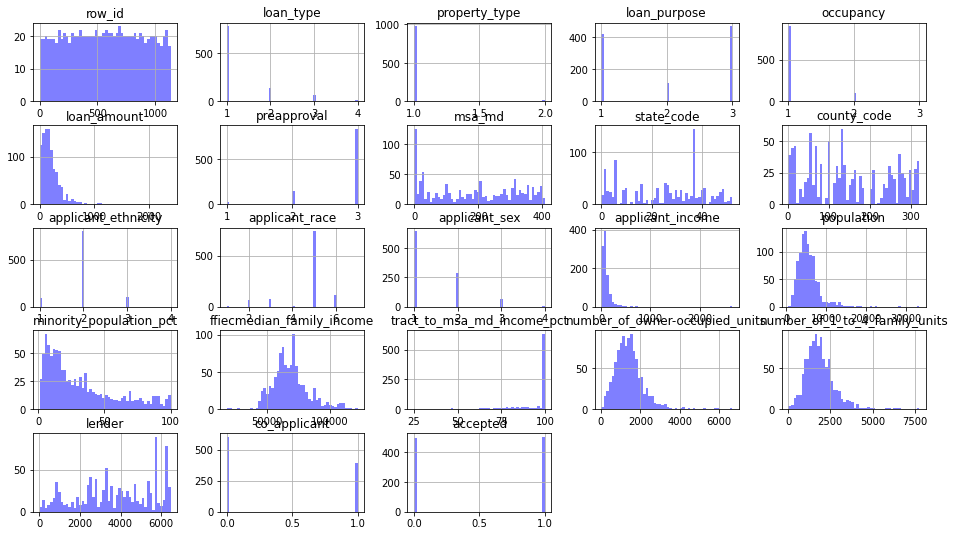

In [24]:
plt.figure()
All[:1000].hist(color='b', alpha=0.5, bins=50)
plt.figsize=(20,20)

#Feature selection

In [25]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split


In [26]:
print(All.columns)
Unused=['tract_to_msa_md_income_pct','number_of_owner-occupied_units','msa_md','county_code','applicant_race','minority_population_pct','accepted']
feats=['loan_type','number_of_1_to_4_family_units',
       'property_type', 'loan_purpose', 'occupancy','lender','co_applicant',
       'loan_amount', 'preapproval', 'state_code','applicant_ethnicity','applicant_sex','applicant_income','population','ffiecmedian_family_income']
#list = ['url','shares']
X = All.drop(Unused, axis = 1)
#x = x[feats]
X.columns
y = All.loc[:,'accepted']

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')


In [27]:
print(All.columns)

Index(['row_id', 'loan_type', 'property_type', 'loan_purpose', 'occupancy',
       'loan_amount', 'preapproval', 'msa_md', 'state_code', 'county_code',
       'applicant_ethnicity', 'applicant_race', 'applicant_sex',
       'applicant_income', 'population', 'minority_population_pct',
       'ffiecmedian_family_income', 'tract_to_msa_md_income_pct',
       'number_of_owner-occupied_units', 'number_of_1_to_4_family_units',
       'lender', 'co_applicant', 'accepted'],
      dtype='object')


In [28]:
#scatter_matrix(X, c='y', figsize=(15,15), s=150, marker='D')
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X)
#X=scaler.transform(X)
df_scaled = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)


In [29]:
X_train, X_test, y_train, y_test = train_test_split( df_scaled, y, test_size=0.20, random_state=42)

#Learners

In [30]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [31]:
X_train.isna().sum()

row_id                           0
loan_type                        0
property_type                    0
loan_purpose                     0
occupancy                        0
loan_amount                      0
preapproval                      0
state_code                       0
applicant_ethnicity              0
applicant_sex                    0
applicant_income                 0
population                       0
ffiecmedian_family_income        0
number_of_1_to_4_family_units    0
lender                           0
co_applicant                     0
dtype: int64

linearregression  0.47967610840034586
Score: 0.07826699664087955
CPU times: user 228 ms, sys: 59 ms, total: 288 ms
Wall time: 188 ms


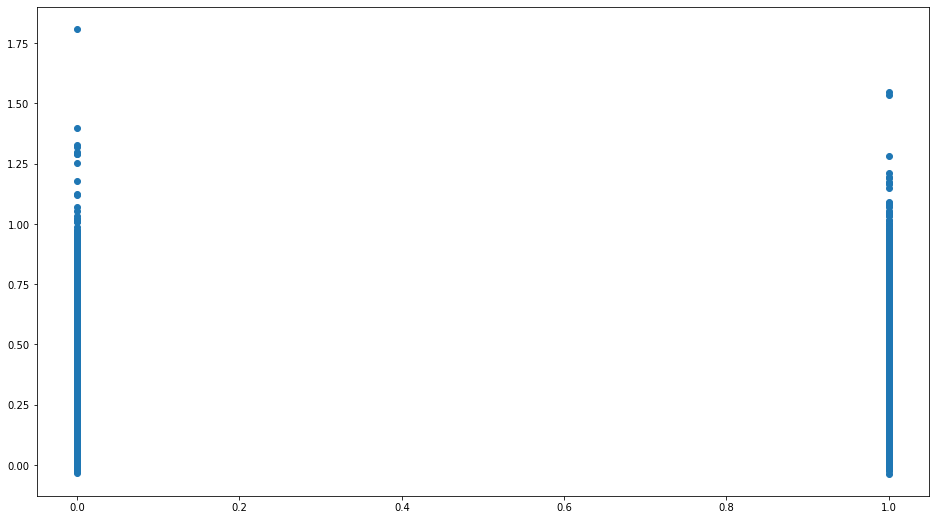

In [32]:
%%time

LinReg = LinearRegression()
LinReg.fit(X_train, y_train)
LinPred = LinReg.predict(X_test)


print('linearregression ', np.sqrt(mean_squared_error(LinPred,y_test)))

plt.scatter(y_test, LinPred)
print ('Score:', LinReg.score(X_test, y_test))


In [33]:
%%time
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report 
from sklearn.metrics import mean_squared_error as mse



Log=LogisticRegression(penalty='l2',C=1.0, intercept_scaling=1, random_state=42, max_iter=100)
## Trains the learner, Log, with the training dataset
Log.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = Log.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61    168076
           1       0.64      0.65      0.65    182528

    accuracy                           0.63    350604
   macro avg       0.63      0.63      0.63    350604
weighted avg       0.63      0.63      0.63    350604

Accuracy score:
 0.6302466600495146
CPU times: user 1.54 s, sys: 593 ms, total: 2.13 s
Wall time: 1.35 s


In [34]:
# Test the learner, Log, with the test dataset
%%time

## Prediction on the training dataset
y_te_pred = Log.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',Log.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           0       0.61      0.61      0.61     42132
           1       0.64      0.64      0.64     45519

    accuracy                           0.63     87651
   macro avg       0.63      0.63      0.63     87651
weighted avg       0.63      0.63      0.63     87651

Accuracy score:
 0.6285724064756819
CPU times: user 212 ms, sys: 114 ms, total: 326 ms
Wall time: 204 ms


In [35]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
#cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
#for i in range(len(cv_metric)):
 #   scores = cross_val_score(Log, X, y, scoring=cv_metric[i],cv=5)
 #   print('\nMetric used: ', cv_metric[i])
  #  print('Cross validation scores:', scores)
  #  print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

In [36]:
# Select your learner
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC  
from sklearn.ensemble import RandomForestClassifier


In [37]:
%%time

RFC = RandomForestClassifier(max_depth=2, random_state=0)
#neigh.fit(X, y)
RFC.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = RFC.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',RFC.score(X_train, y_train))



Classification repport:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62    168076
           1       0.65      0.67      0.66    182528

    accuracy                           0.64    350604
   macro avg       0.64      0.64      0.64    350604
weighted avg       0.64      0.64      0.64    350604

Accuracy score:
 0.6393509486486179
CPU times: user 16.1 s, sys: 117 ms, total: 16.2 s
Wall time: 16.2 s


In [38]:
## Prediction on the training dataset
%%time

y_te_pred = RFC.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',RFC.score(X_test, y_test))

Classification repport:
               precision    recall  f1-score   support

           0       0.63      0.61      0.62     42132
           1       0.65      0.66      0.66     45519

    accuracy                           0.64     87651
   macro avg       0.64      0.64      0.64     87651
weighted avg       0.64      0.64      0.64     87651

Accuracy score:
 0.637585424011135
CPU times: user 870 ms, sys: 11.9 ms, total: 882 ms
Wall time: 881 ms


In [39]:
%%time
neigh = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)


#neigh.fit(X, y)
neigh.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = neigh.predict(X_train)

# Classification repport on the training dataset:
print('Classification report:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_train, y_train))

Classification repport:
               precision    recall  f1-score   support

           0       0.74      0.70      0.72    168076
           1       0.74      0.78      0.76    182528

    accuracy                           0.74    350604
   macro avg       0.74      0.74      0.74    350604
weighted avg       0.74      0.74      0.74    350604

Accuracy score:
 0.7421963240579115
CPU times: user 36min 16s, sys: 213 ms, total: 36min 16s
Wall time: 36min 17s


In [ ]:
%%time

## Prediction on the training dataset
y_te_pred = neigh.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',neigh.score(X_test, y_test))

In [ ]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
#cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
#for i in range(len(cv_metric)):
 #   scores = cross_val_score(neigh, X, y, scoring=cv_metric[i],cv=5)
  #  print('\nMetric used: ', cv_metric[i])
   # print('Cross validation scores:', scores)
    #print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

In [ ]:
#neigh.fit(X, y)
%%time
SVClass=SVC(C=1.0, kernel='rbf', degree=3, gamma='auto_deprecated', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', random_state=None)

SVClass.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = SVClass.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',SVClass.score(X_train, y_train))

In [ ]:
# Test the learner, Log, with the test dataset
%%time
## Prediction on the training dataset
y_te_pred = SVClass.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',SVClass.score(X_test, y_test))

In [ ]:
#SDG=SGDClassifier(loss='squared_hinge', penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
%%time

SDG=SGDClassifier(loss="perceptron", eta0=1, learning_rate="constant",   penalty=None)
SDG.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = SDG.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',SDG.score(X_train, y_train))

In [ ]:
## Prediction on the training dataset
%%time

y_te_pred = SDG.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',SDG.score(X_test, y_test))

In [ ]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
#cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
#for i in range(len(cv_metric)):
 #   scores = cross_val_score(SDG, X, y, scoring=cv_metric[i],cv=5)
  #  print('\nMetric used: ', cv_metric[i])
 #   print('Cross validation scores:', scores)
   # print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

In [ ]:
%%time

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort=False)
DTC.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = DTC.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',DTC.score(X_train, y_train))

In [ ]:
## Prediction on the training dataset
%%time

y_te_pred = DTC.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',DTC.score(X_test, y_test))

In [ ]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
#cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
#for i in range(len(cv_metric)):
  #  scores = cross_val_score(DTC, X, y, scoring=cv_metric[i],cv=5)
  #  print('\nMetric used: ', cv_metric[i])
   # print('Cross validation scores:', scores)
   # print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

In [ ]:
pip install catboost


In [ ]:
%%time
from catboost import CatBoostClassifier


clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    #loss_function='CrossEntropy'
)


clf.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = clf.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',clf.score(X_train, y_train))

In [ ]:
%%time

y_te_pred = clf.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',clf.score(X_test, y_test))

In [ ]:
#from sklearn.model_selection import cross_val_predict, cross_val_score

# List of metrics that helps in assessing the performance of the learner for different metric
#cv_metric = ['accuracy', 'precision_macro', 'recall_macro']
#for i in range(len(cv_metric)):
 #   scores = cross_val_score(MLP, X, y, scoring=cv_metric[i],cv=5)
  #  print('\nMetric used: ', cv_metric[i])
   # print('Cross validation scores:', scores)
   # print('Mean of the scores: ', scores.mean(),'\n with standard deviation', scores.std())

In [ ]:
%%time

MLP=MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)
MLP.fit(X_train, y_train)

# Prediction on the training dataset
y_tr_pred = MLP.predict(X_train)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_train, y_tr_pred))
# Accuracy score on the training dataset
print('Accuracy score:\n',MLP.score(X_train, y_train))

In [ ]:
%%time

## Prediction on the training dataset
y_te_pred = MLP.predict(X_test)

# Classification repport on the training dataset:
print('Classification repport:\n',classification_report(y_test, y_te_pred))

# Accuracy score on the training dataset
print('Accuracy score:\n',MLP.score(X_test, y_test))

In [ ]:
# Plot feature importance
feature_importance = MLP.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:

models = []
models.append(('LR', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', ElasticNet()))
models.append(('knn', KNeighborsRegressor()))
models.append(('treeregre', DecisionTreeRegressor())) 
models.append(('xgboost', XGBRegressor()))


results = []
names = []
scoring = 'r2'
X.head()
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print('--------------------')
  print(msg)
  
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show() 

In [ ]:
new=All.groupby('applicant_ethnicity')['accepted'].mean().reset_index().rename(
    columns={'applicant_ethnicity':'applicant_ethnicity','accepted' : 'MeanAccepted'})
new

In [ ]:
new_2=All.groupby('applicant_sex')['accepted'].mean().reset_index().rename(
    columns={'applicant_sex':'applicant_sex','accepted' : 'MeanAccepted'})
new_2

In [ ]:
new_3=All[All.state_code == 45]
new_4=new_3.groupby('applicant_income')['loan_amount'].mean().reset_index().rename(
    columns={'applicant_income':'applicant_income','loan_amount' : 'Meanloan'})
new_4.head()


In [ ]:
plt.plot(new_4.applicant_income,new_4.Meanloan)

In [ ]:
new_5=All[All.state_code == 48]
new_6=new_5.groupby('county_code')['accepted'].mean().reset_index().rename(
    columns={'county_code':'county_code','accepted' : 'MeanAccepted'})
new_6.head()

In [ ]:
new_7=new_6.drop(0)
new_7.describe()

In [ ]:
plt.plot(new_7.county_code,new_7.MeanAccepted)

In [ ]:
new_8=All[All.state_code == 2]
new_8.head()

In [ ]:
new_9=new_8.groupby('loan_type')['accepted'].mean().reset_index().rename(
    columns={'loan_type':'loan_type','accepted' : 'MeanAccepted'})
new_9

In [ ]:
new_10=All[All.state_code == 4]
new_11=new_10.groupby('loan_type')['accepted'].mean().reset_index().rename(
    columns={'loan_type':'loan_type','accepted' : 'MeanAccepted'})
new_11